In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


In [2]:
hosts = [f"br{str(i).zfill(2)}" for i in range(1,31)]
#filepaths = [ f"backup/deploy_test/{host}.csv" for host in hosts]
filepaths = [ f"backup/docker_120/{host}.csv" for host in hosts]

In [3]:
def clean_and_addheader(filepath):
    new_lines=[]
    with open(filepath) as f:
        lines = f.readlines()
        started_time = float(lines[0].strip().split(",")[0])
        for line in lines:
            striped_words = line.strip().split(",")
            if len(striped_words) != 3:
                continue
            try:
                this_time = round(float(striped_words[0]),1) # 小数点第一位で四捨五入
            except:
                continue # 時間以外のものが混ざるなら殺す
            striped_words[0] = this_time
            striped_words[1] = int(striped_words[1])
            striped_words[2] = int(striped_words[2])
            new_lines.append(striped_words)
    return new_lines

In [33]:
# 実験開始時刻を追加
start_time = 1577967057 + 10
#start_time = 1577967148
end_time = 1577967272



In [34]:
dfs = []
# キレイにしてpandasに挿入
for index, filepath in enumerate(filepaths):
    host = hosts[index]
    df = pd.DataFrame(clean_and_addheader(filepath),columns=["time",f"{host}_gobgp",f"{host}_jool"])
    selected = df.query(f"time >= {start_time}")
    selected["time"] = selected["time"] - start_time
    selected.set_index("time")
    dfs.append(selected)

merged = pd.concat(dfs,sort=True)    
# merged["time"] = pd.to_datetime(merged['time'].astype(float), unit='s')
merged = merged.sort_values("time")
merged = merged.fillna(method='ffill')
merged = merged.reset_index(drop=True)
merged = merged.groupby('time').mean()

/Users/yas-nyan/.local/share/virtualenvs/monitor-0c4RUuDQ/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
# 300インデックスまでは消す
make_sense_df = merged

In [36]:
make_sense_df.to_csv("docker_120.csv")

In [37]:
coluｍns_j = [f"{host}_jool" for host in hosts ]
coluｍns_b = [f"{host}_gobgp" for host in hosts ]

In [38]:
columns_br01 = ["br01_jool","br01_gobgp"]

In [39]:
end_offset = end_time - start_time - 1 # 適当に-1秒する...

Text(0, 0.5, 'count of EAM')

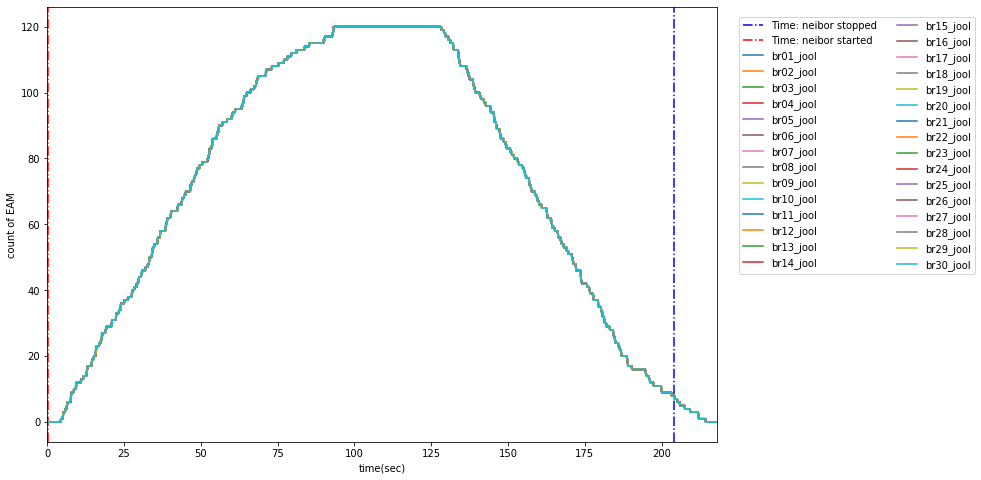

In [43]:
# グラフ作成
fig = plt.figure(figsize=(12,8))

ax = fig.add_subplot(111)
end_line = ax.axvline(end_offset, ls = "-.", color = "blue")
start_line = ax.axvline(0.1, ls = "-.", color = "red")
end_line.set_label("Time: neibor stopped")
start_line.set_label("Time: neibor started")
make_sense_df[columns_j].plot(ax=ax,style="-")
ax.legend(bbox_to_anchor=(1.4, 1), loc='upper right', borderaxespad=1,fontsize=10,ncol=2,)

ax.set_xlabel("time(sec)")
ax.set_ylabel("count of EAM")
